<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Распределение-классов" data-toc-modified-id="Распределение-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение классов</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Поиск-наилучшей-модели" data-toc-modified-id="Поиск-наилучшей-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск наилучшей модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Проведём-оценку-эффективности-методов-борьбы-с-дисбалансом" data-toc-modified-id="Проведём-оценку-эффективности-методов-борьбы-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведём оценку эффективности методов борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 



**_Описание данных:_**
 - `RowNumber` — индекс строки в данных
 - `CustomerId` — уникальный идентификатор клиента
 - `Surname` — фамилия
 - `CreditScore` — кредитный рейтинг
 - `Geography` — страна проживания
 - `Gender` — пол
 - `Age` — возраст
 - `Tenure` — сколько лет человек является клиентом банка
 - `Balance` — баланс на счёте
 - `NumOfProducts` — количество продуктов банка, используемых клиентом
 - `HasCrCard` — наличие кредитной карты
 - `IsActiveMember` — активность клиента
 - `EstimatedSalary` — предполагаемая зарплата
 - `Exited` — факт ухода клиента
 
**_План работы:_**
 - Исследование задачи
 - Создание модели
 - Борьба с дисбалансом
 - Тестирование модели
 - Проверка модели на адекватность
 - Общий вывод

## Подготовка данных

In [2]:
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score

In [3]:
display(HTML("<style>.container { width:80% !important; <style>}"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [4]:
try:
    data = pd.read_csv('E:/BuduBogatym/Churn.csv')
except:
    data = pd.read_csv(
        'https://code.s3.yandex.net/datasets/Churn.csv')

In [5]:
data.head(10)

In [6]:
# Проверим информацию о датасете
data.info()

In [7]:
# Проверим наличеие пропусков в датасете
data.isnull().sum()

Заметим, что пропуски имеются только в столбце `Tenure` , а также тип данных всех столбцов является корректным.

Предположу, что данные пропуски связаны с тем, что это новые клиенты. Поэтому заменим данные пропуски на 0

In [8]:
#Заменим пропуски в столбце на 0
data['Tenure'].fillna(0, inplace=True)

Попробуем удалить столбцы `CustomerId`,`Surname`,`RowNumber`, так как эти столбцы помешают обучению нашей модели.

In [9]:
print('Уникальные ID:', data['CustomerId'].nunique())

Так как количество уникальных пользователей совпадает с числом строк, то можно удалить вышеперечисленные столбцы

In [10]:
data = data.drop(['CustomerId','Surname','RowNumber'], axis = 1)

У нас имеются категориальные признаки, которое могут серьёзно повлиять на обучение моделей, поэтому воспользуемся `OHE`.

In [11]:
# Применим OHE к датасету, с удалением первоначального столбца
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head(5)

In [13]:
#Переименуем столбц
data.rename({'Gender_Male':'gender'}, axis = 1, inplace=True)

Приведём названия столбцов в нашем датасете к стандарту

In [14]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
data.rename({'ender':'gender', 'geography__germany':'geography_germany', \
            'geography__spain':'geography_spain'}, axis=1, inplace=True)


## Исследование задачи

### Распределение классов

Построим гистограммы по количественным переменным для оценки на выбросы и распределения.

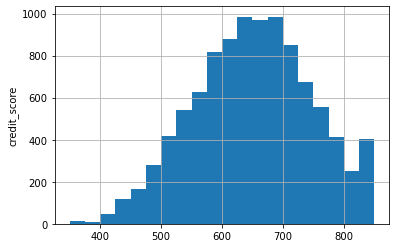

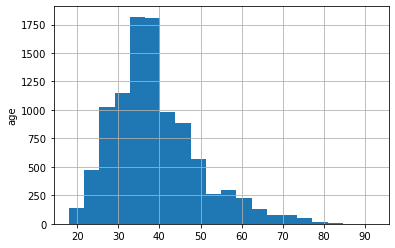

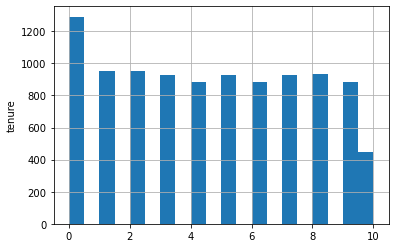

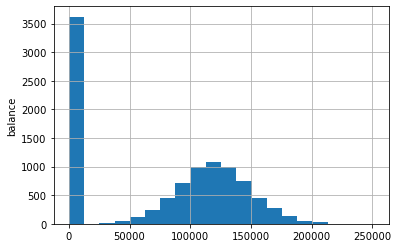

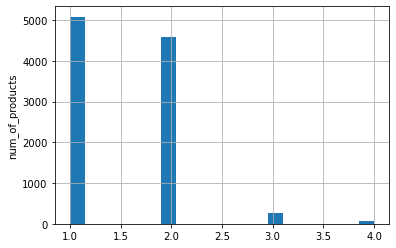

In [15]:
# Создадим цикл, который пройдется по выбранным столбцам и построит графики для каждого из них
for i in ['credit_score', 'age', 'tenure', 'balance', 'num_of_products']:
    data[i].hist(bins = 20).set(ylabel = i)
    plt.show()
    

 * `credit_score` имеет нормальное распределение
 * `age` имеет нормальное распределение но с некоторым смещением влево
 * `tenure` имеет почти одинаковые значения на участке пользования банков от 1 до 9 лет включительно
 * `balance` имеет нормальное распределение
 * `num_of_products` похож на распределение Пуассона

**Удалять аномальные значения черевато для данного исследования, так как в условиях задачи такие значения имеют место быть и значительно влиять на дальнейшее обучение моделей**

### Исследование баланса классов

In [16]:
data.head()

In [17]:
data.has_cr_card.sum()/data.has_cr_card.count()*100

Более 70 процентов людей владеют кредитной картой

In [18]:
data.is_active_member.sum()/data.is_active_member.count()*100

Более 51 процента клиентов являются активными

In [19]:
data.exited.sum()/data.exited.count()*100

Лишь 20 процентов клиентов перестали пользоваться услугами банка

In [20]:
data.geography_germany.sum()/data.geography_germany.count()*100

Около 25 процентов клиентов из Германии

In [21]:
data.geography_spain.sum()/data.geography_spain.count()*100

Около 25 процентов клиентов из Испании

Следовательно, оставшиеся 50% клиенты Франции

In [22]:
data.gender.sum()/data.gender.count()*100

54 процентов клиентов мужчины

### Вывод

Явный дисбаланс классов можно проследить в столбцах `has_cr_card`, `geography`, `exited`.
    
В конечном итоге их нужно будет сбалансировать для получения лучшей модели

### Поиск наилучшей модели

Разобьём наш датасет на выборки

In [23]:
data_features = data.drop('exited', axis=1)
data_target = data['exited']

In [24]:
# Делим выборки на тестовую и тренировочную
train_features, test_features, train_target, test_target = train_test_split(
    data_features, data_target, test_size=0.25, random_state=12345, stratify=data['exited'])

In [25]:
# Проверим корректность деления
print(train_features.shape)
print(train_target.shape)


print(test_features.shape)
print(test_target.shape)

Воспользуемся функцией подбора оптимальных параметров для модели - `GridSearch`

In [26]:
def find_best_pr(model, parameters=None, features=None, target=None):
    # Определяем GridSearch с необходимыми параметрами
    grid = GridSearchCV(model, parameters, cv=5, n_jobs=-1,
                        scoring=['f1', 'roc_auc', 'accuracy'], refit='f1')
    grid.fit(features, target)
    
    try:
        feature_importance = grid.best_estimator_.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        fig = plt.figure(figsize=(6, 6))
        plt.barh(range(len(sorted_idx)),
                 feature_importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(features.columns)[sorted_idx])
        plt.title('Feature Importance')
        fig.show()
    except:
        pass

    print('Accuracy:', grid.cv_results_[
          'mean_test_accuracy'][grid.best_index_])
    print('f1:', grid.cv_results_['mean_test_f1'][grid.best_index_])
    print('ROC_AUC:', grid.cv_results_['mean_test_roc_auc'][grid.best_index_])
    print('Model:', grid.best_estimator_)
    return grid

**Модель решающего дерева**

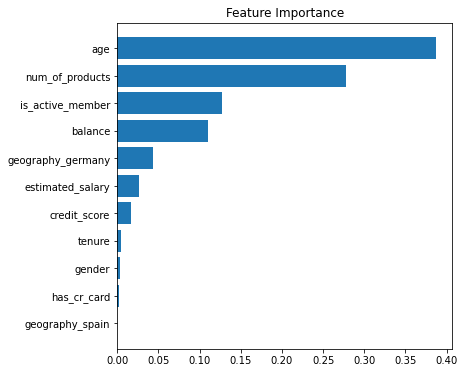

In [27]:
%%time
model = DecisionTreeClassifier(random_state=12345)
parameters = {
    'max_depth': range(1, 25, 1)
}

best_dt_model = find_best_pr(model, parameters, train_features, train_target)

**Модель логистической регрессии**

In [28]:
%%time
model = LogisticRegression(random_state=12345)
parameters = {}

best_lr_model = find_best_pr(model, parameters, train_features, train_target)

**Модель случайного леса**

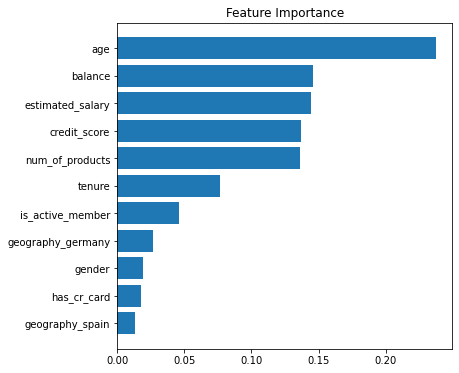

In [29]:
%%time
model = RandomForestClassifier(random_state=12345)
parameters = {
    'max_depth': range(1, 25, 1), 'n_estimators': range(10, 101, 10)
}

best_rf_model = find_best_pr(model, parameters, train_features, train_target)

**Модель XGBoost**

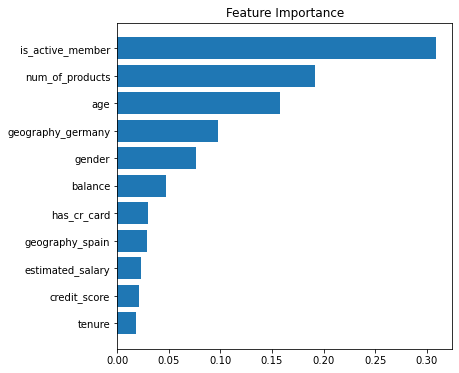

In [30]:
%%time
model = XGBClassifier(booster='gbtree',
                      eval_metric='auc',
                      use_rmm=True,
                      verbosity=0)
parametrs = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.15]
}

best_xgb_model = find_best_pr(model, parameters, train_features, train_target)

**Модель CatBoost**

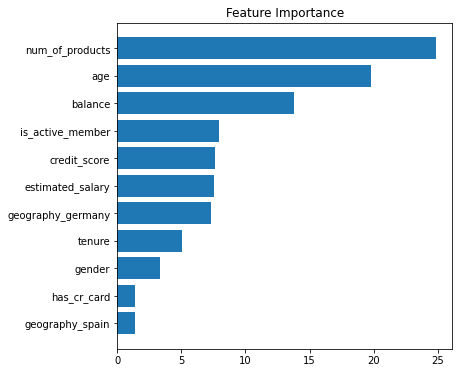

In [31]:
%%time
model = CatBoostClassifier(
    random_state=12345, verbose=False, loss_function='Logloss')
parameters = {
    'max_depth': range(6, 12),
    'learning_rate': [.015]
}

best_cb_model = find_best_pr(model, parameters, train_features, train_target)

**По результатам исследования без учёта баланса классов наилучшие показатели метрик имеет модель CatBoost:**  
 * f1 = 0.593
 * ROC_AUC = 0.865


## Борьба с дисбалансом

**Воспользуемся методом увеличения выборки `Upsample`**

In [32]:
# Для удобства создадим функцию, которая будет увеличивать выборку
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [33]:
# Воспользуемся полученной функцией на тренировочной выборке и проверим снова дисбаланс
features_upsampled, target_upsampled = upsample(
    train_features, train_target, 4)

print('Процент клиентов, которые ушли из банка: {:.0f}%'.format(
    target_upsampled.sum()/target_upsampled.count()*100))
print('Процент клиентов, которые имеют кредитную карту: {:.0f}%'.format(
    features_upsampled.has_cr_card.sum()/features_upsampled.has_cr_card.count()*100))

В данном методе классы стали сбалансированными

**Воспользуемся алгоритмом `downsample`**

In [46]:
# Для удобства создадим функцию, которая будет уменьшать выборку
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [44]:
features_downsampled, target_downsampled = downsample(
    train_features, train_target, 0.1)
print(features_downsampled.shape)
print(target_downsampled.shape)


print('Процент клиентов, которые ушли из банка: {:.0f}%'.format(
    target_downsampled.sum()/target_downsampled.count()*100))
print('Процент клиентов, которые имеют кредитную карту: {:.2f}%'.format(
    features_downsampled.has_cr_card.sum()/features_downsampled.has_cr_card.count()*100))

Баланс классов с данным методом не стал лучше, предполагаю, что дело в малом количестве данных, которые получились после уменьшения выборки. Дальнейшее использование данного метода в работе не считаю целесообразным.

### Проведём оценку эффективности методов борьбы с дисбалансом

Для более быстрого анализа воспользуемся моделью DeсisionTree, так как она имеет не высокую скорость обучения и подходит для выбора наилучшего метода баланса классов

**Используем метод Balanced на модели**

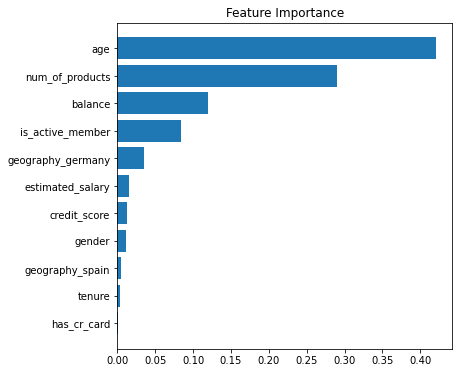

In [47]:
%%time
#Используем параметр class_weight = 'balanced' для балансировки классов и посмотрим на необходимые метрики

model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
parameters = {
    'max_depth': range(1, 25, 1)
}

best_dt_model = find_best_pr(model, parameters, train_features, train_target)

**Воспользуемся методом Upsample**

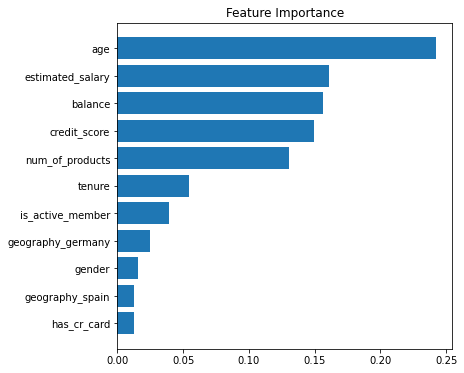

In [48]:
%%time
# Проверим метрики на upsambled выборке
model = DecisionTreeClassifier(random_state=12345)
parameters = {
    'max_depth': range(1, 25, 1)
}

best_dt_model_u = find_best_pr(
    model, parameters, features_upsampled, target_upsampled)

**Вывод:** В результате исследования наилучшем способом борьбы с дисбалансом оказался метод `balanced`. Поэтому обучим с нуля моделии, используя этот параметр.

**Модель решающего дерева**

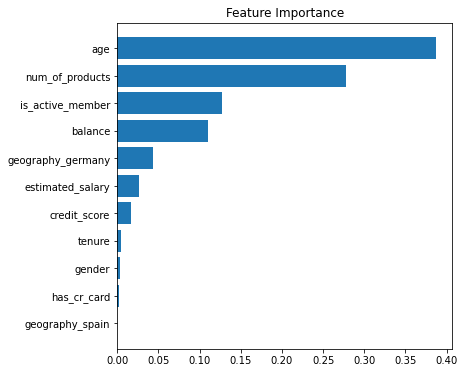

In [49]:
%%time
model = DecisionTreeClassifier(random_state=12345)
parameters = {
    'max_depth': range(1, 25, 1)
}

best_dt_model = find_best_pr(model, parameters, train_features, train_target)

**Модель логистической регрессии**

In [50]:
%%time
model = LogisticRegression(random_state=12345, class_weight='balanced')
parameters = {}

best_lr_model = find_best_pr(model, parameters, train_features, train_target)

**Модель случайного леса**

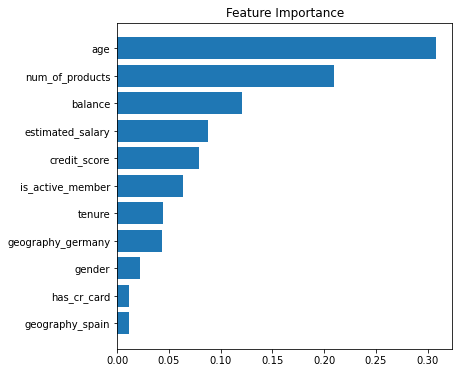

In [51]:
%%time
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
parameters = {
    'max_depth': range(1, 25, 1), 'n_estimators': range(10, 101, 10)
}

best_rf_model = find_best_pr(model, parameters, train_features, train_target)

**Модель Catboost**

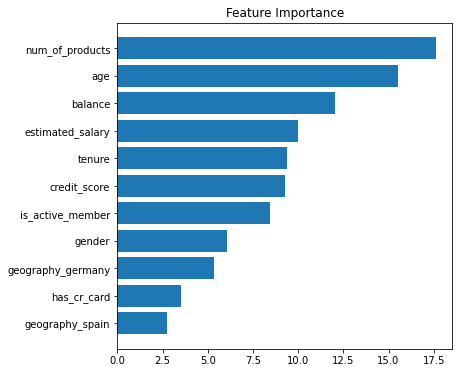

In [52]:
%%time
# Создадим отдельную переменную, куда запишем вес класса для CatBoost
classes = np.unique(train_target)
weights = compute_class_weight(
    class_weight='balanced', classes=classes, y=train_target)
class_weights = dict(zip(classes, weights))

# Обучим модель учитывая вес класса
model = CatBoostClassifier(random_state=12345, verbose=False,
                           loss_function='Logloss', class_weights=class_weights)
parameters = {
    'max_depth': range(6, 12),
    'learning_rate': [.01]
}

best_cb_model = find_best_pr(model, parameters, train_features, train_target)

В очередной раз лучшими метриками обладает модель `CatBoost` и имеет следующие показатели:
 * f1 = 0.622
 * ROC_AUC = 0.85

В результате данная модель будет использована для тестирования

## Тестирование модели

In [ ]:
# Предсказываем целевой признак на тестовой выборке 
prediction = best_cb_model.predict(test_features)
print('f1_CatBoost: {:.4f}'.format(f1_score(test_target, prediction)))
print('Accuracy_CatBoost: {:.4f}'.format(
    accuracy_score(test_target, prediction)))

# Рассчитываем auc_roc на тестовой выборке
probabilities = best_cb_model.predict_proba(test_features)
probabilities_one = probabilities[:, 1]

auc_roc = roc_auc_score(test_target, probabilities_one)

print('ROC_AUC_CatBoost: {:.4f}'.format(auc_roc))

Прослеживается рост показателей при тестировании моделей, что не может не радовать.

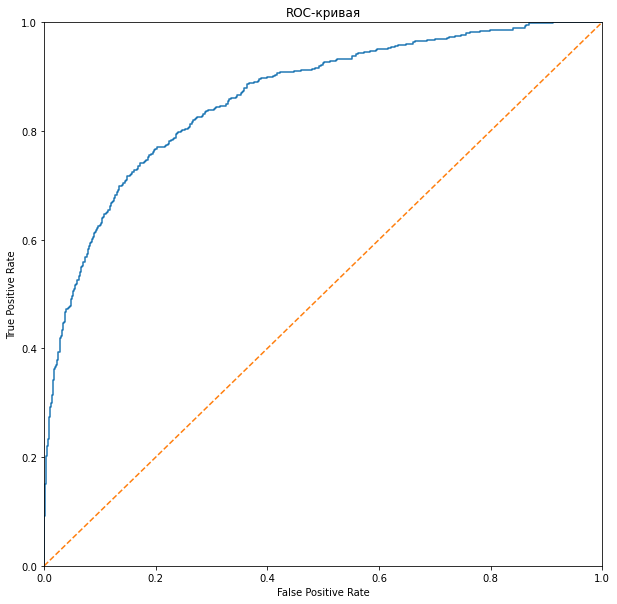

In [55]:
# Построим ROC-кривую
probabilities_test = best_cb_model.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]
print('Площадь под кривой ROC: {:.4f}'.format(roc_auc_score(test_target, probabilities_one_test)))
fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test) 
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Результатом данного графика является вывод о высоком качестве модели, так как его предсказания сильно отличаются от кривой случайной модели.

## Проверка модели на адекватность

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")  # Определяем тип модели
dummy_clf.fit(train_features, train_target)  # Обучаем модель

# Предсказываем целевые признаки используя тестовые признаки
dummy_predict = dummy_clf.predict(test_features)

print('Accuracy_DummyClassifier: {:.4f}'.format(
    accuracy_score(test_target, dummy_predict)))
print('f1_DummyClassifier: {:.4f}'.format(
    f1_score(test_target, dummy_predict)))

probabilities_dummy = dummy_clf.predict_proba(test_features)
probabilities_one_dummy = probabilities_dummy[:, 1]

auc_roc_dummy = roc_auc_score(test_target, probabilities_one_dummy)


print('ROC_AUC_DummyClassifier: {:.4f}'.format(auc_roc_dummy))

## Общий вывод:

1. В ходе работы были подготовлены данные к исследованию
2. Была исследована данная задача:
    * Исследован баланс классов
    * Изучены модели без учёта дисбаланса
3. Созданы следующие модели обучения:
    * Логистическая регрессия
    * Случайный лес
    * Решающее дерево
    * CatBoost
    * XGBoost
4. Исследованы методы борьбы с дисбалансом классов:
    * Upsampling
    * Downsampling
    * Balanced
5. Были переобучены модели с учетом баланса классов
6. По результатам исследования признана лучшей моделью - `CatBoost`
7. Полученная модель прошла проверку на адекватность.